# Cabinet Start-Up Procedure

1. Turn on cabinet power in back of cabinet
2. Turn on sensor power (24 Volts). The sensor power inputs are labeled.
3. Compile code to AMDC
4. Turn on power to DC bus of cabinet.
5. Run Jupyter Notebook. 

Import neccessary modules

In [41]:
from Cabinet_Test import Cabinet
import sys


sys.path.append(r'..\AMDC-Firmware\scripts')

In [42]:
from AMDC import AMDC

In [ ]:
amdc = AMDC(port = 'COM13', cmdEcho = True, printOutput=True)

Set up CRAMB and AMDC

In [43]:
Vdc = 20
cabinet = Cabinet(Vdc, amdc, debug = False)   

	> cabinet setup 20.00000
['cabinet setup 20.00000', 'SUCCESS']
	> cabinet init_cb
['cabinet init_cb', 'SUCCESS']


In [44]:
cabinet.enable_pwm()
cabinet.openloop_vsi_3(5, 10, 10)
cabinet.openloop_vsi_3_enable(5)

	> hw pwm on
['hw pwm on', 'SUCCESS']
	> cabinet openloop_vsi_3 5 10.000000 10.000000
['cabinet openloop_vsi_3 5 10.000000 10.000000', 'SUCCESS']
	> cabinet openloop_vsi_3_enable  5
['cabinet openloop_vsi_3_enable  5', 'SUCCESS']


In [46]:
cabinet.openloop_vsi_3(5, 5, 3)

	> cabinet openloop_vsi_3 5 5.000000 3.000000
['cabinet openloop_vsi_3 5 5.000000 3.000000', 'SUCCESS']


In [47]:
cabinet.disable_pwm()

	> hw pwm off
['hw pwm off', 'SUCCESS']


In [19]:

cabinet.disconnect()

## Logging


In [24]:
import matplotlib

In [25]:
import time
import pathlib as pl
import sys
repo_dir = '..'                                      # CHANGE THIS TO YOUR REPO DIRECTORY
repo_dir = pl.Path(repo_dir)

from AMDC_Logger import AMDC_Logger, find_mapfile

In [11]:
amdc.disconnect()

In [26]:
mapfile_path = find_mapfile(repo_dir)
logger = AMDC_Logger(AMDC = amdc, mapfile = mapfile_path)
logger.sync()

# View which variables are logged
logger.info()

	> log info
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:



In [32]:
logger.unregister_all()
logger.register('mb_I1 mb_I2 mb_I3 mb_I4 mb_I5 mb_I6', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

	> log unreg 0
['log unreg 0', 'SUCCESS']
	> log unreg 1
['log unreg 1', 'SUCCESS']
	> log unreg 2
['log unreg 2', 'SUCCESS']
	> log unreg 3
['log unreg 3', 'SUCCESS']
	> log reg 0 LOG_va 1213072 1000 double
['log reg 0 LOG_va 1213072 1000 double', 'SUCCESS']
	> log reg 1 LOG_vb 1213080 1000 double
['log reg 1 LOG_vb 1213080 1000 double', 'SUCCESS']
	> log reg 2 LOG_vc 1213088 1000 double
['log reg 2 LOG_vc 1213088 1000 double', 'SUCCESS']
	> log reg 3 LOG_vdc 1213128 1000 double
['log reg 3 LOG_vdc 1213128 1000 double', 'SUCCESS']
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:
LOG_va                0            double              1000.0                0       
LOG_vb                1            double              1000.0                0       
LOG_vc                2            double              1000.0                0       
LOG_vdc               3            double

In [33]:
####################   COLLECT DATA   ####################
# Clear the logger, then record data
logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

	> log empty_all
['log empty_all', 'SUCCESS']
	> log start
['log start', 'SUCCESS']
	> log stop
['log stop', 'SUCCESS']


In [34]:
####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'test_data.csv')
data

	> log dump bin 0
Dumping: LOG_va
Dump took: 0.999  sec
Dump rate: 1355.344  sps
Num samples: 1354 

	> log dump bin 1
Dumping: LOG_vb
Dump took: 0.908  sec
Dump rate: 1491.178  sps
Num samples: 1354 

	> log dump bin 2
Dumping: LOG_vc
Dump took: 1.001  sec
Dump rate: 1352.555  sps
Num samples: 1354 

	> log dump bin 3
Dumping: LOG_vdc
Dump took: 0.895  sec
Dump rate: 1512.858  sps
Num samples: 1354 



,va,vb,vc,vdc
t,,,,
0.000,-4.817537e-01,0.999781,-0.518027,20.0
0.001,-4.257793e-01,0.996493,-0.570714,20.0
0.002,-3.681245e-01,0.989272,-0.621148,20.0
0.003,-3.090170e-01,0.978148,-0.669131,20.0
0.004,-2.486899e-01,0.963163,-0.714473,20.0
0.005,-1.873813e-01,0.944376,-0.756995,20.0
0.006,-1.253332e-01,0.921863,-0.796530,20.0
0.007,-6.279052e-02,0.895712,-0.832921,20.0
0.008,-1.491351e-10,0.866025,-0.866025,20.0


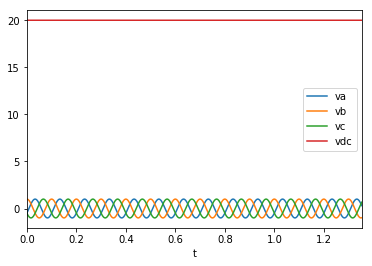

In [35]:
data.filter(regex="^va|vb|vc|vdc$").plot()

In [ ]:
data.filter(regex="_star").plot()

In [ ]:
data.filter(regex="Ix_star").plot()